ANALISIS SENTIMEN PANDANGAN PUBLIK TERHADAP PRESIDEN AMERIKA (TRUMP) MENGGUNAKNA VADER

Import library yang akan digunakan

In [2]:
import pandas as pd
import re
import string
import nltk

nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     /Users/muhammadhabsyimubarak/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

### Membaca data csv menggunakan library pandas 

In [3]:
# Membaca data
data_path = '../tweets-data/trump.csv'
df = pd.read_csv(data_path)

#### Lihat baris data teratas sebanyak 5 baris menggunakan df.head()

In [4]:
# Cek kolom yang tersedia
df.head()

,conversation_id_str,created_at,favorite_count,full_text,id_str,image_url,in_reply_to_screen_name,lang,location,quote_count,reply_count,retweet_count,tweet_url,user_id_str,username
0,1976075103176884627,Wed Oct 08 23:59:52 +0000 2025,32,WATCH: Gov. JB Pritzker claims President Trump...,1976075103176884627,https://pbs.twimg.com/amplify_video_thumb/1975...,NaN,en,NaN,2,16,3,https://x.com/undefined/status/197607510317688...,1441965051414339586,NaN
1,1976075098697462114,Wed Oct 08 23:59:51 +0000 2025,66,Trump raised the Bar and the rest ... https://...,1976075098697462114,https://pbs.twimg.com/media/G2xt1JiXYAACbSO.jpg,NaN,en,NaN,1,11,17,https://x.com/undefined/status/197607509869746...,1646706148257529865,NaN
2,1976075095753077041,Wed Oct 08 23:59:51 +0000 2025,202,Sen FETTERMAN votes NO on the War Powers Resol...,1976075095753077041,NaN,NaN,en,NaN,25,41,78,https://x.com/undefined/status/197607509575307...,14007532,NaN
3,1976075075746250859,Wed Oct 08 23:59:46 +0000 2025,88,President Trump Beats Democrats AGAIN - Massiv...,1976075075746250859,https://pbs.twimg.com/media/G2xtzoAWcAAEyhL.jpg,NaN,en,NaN,0,3,63,https://x.com/undefined/status/197607507574625...,1798808895965847552,NaN
4,1976075060717945219,Wed Oct 08 23:59:42 +0000 2025,613,Trump Announces Israel Hamas PEACE PLAN SIGNED...,1976075060717945219,NaN,NaN,en,NaN,1,66,59,https://x.com/undefined/status/197607506071794...,27000730,NaN


#### 🧹 Cleaning Teks

Tahap ini bertujuan untuk membersihkan tweet dari elemen-elemen yang tidak relevan agar siap untuk analisis sentimen yang ada didalam fungsi clean_text().

Langkah-langkah pembersihan:

1. Case folding – mengubah seluruh teks menjadi huruf kecil (text.lower()), agar kata serupa dianggap sama.
2. Hapus URL – menghapus tautan seperti http:// atau www. menggunakan regex.
3. Hapus mention & hashtag – menghapus @username dan #tagar yang tidak menambah makna sentimen.
4. Hapus angka – menghapus semua digit numerik (\d+).
5. Hapus tanda baca – menghapus simbol seperti koma, titik, tanda seru, dll.
6. Hapus emoji & karakter non-ASCII – agar teks hanya berisi huruf latin standar.
7. Hapus spasi berlebih – merapikan teks dari spasi ganda dan spasi di awal/akhir kalimat.
8. Terapkan ke dataset – fungsi clean_text() diterapkan ke kolom full_text menghasilkan kolom baru clean_text.
9. Tampilkan hasil – menampilkan perbandingan antara teks asli dan teks bersih untuk memastikan proses berhasil.

In [5]:
def clean_text(text: str) -> str:
    """Membersihkan teks dari URL, mention, hashtag, angka, tanda baca, dan emoji."""
    text = text.lower()                                              # Case folding
    text = re.sub(r'http\S+|www\S+', '', text)                       # Hapus URL
    text = re.sub(r'@\w+', '', text)                                 # Hapus mention
    text = re.sub(r'#\w+', '', text)                                 # Hapus hashtag
    text = re.sub(r'\d+', '', text)                                  # Hapus angka
    text = text.translate(str.maketrans('', '', string.punctuation)) # Hapus tanda baca
    text = re.sub(r'[^\x00-\x7f]', '', text)                         # Hapus emoji
    text = re.sub(r'\s+', ' ', text).strip()                         # Hapus spasi berlebih
    return text

# Terapkan pembersihan teks
df['clean_text'] = df['full_text'].apply(clean_text)

# perbandingan sebelum dan sesudah pembersihan
pd.set_option('display.max_colwidth', None)
df[['full_text', 'clean_text']].head()

,full_text,clean_text
0,WATCH: Gov. JB Pritzker claims President Trump always chickens out after he called for his arrest. We've done nothing wrong here. And very importantly it's Donald Trump that is breaching the Constitution breaking the law. We're taking him to court. https://t.co/C7jXkNkvW3,watch gov jb pritzker claims president trump always chickens out after he called for his arrest weve done nothing wrong here and very importantly its donald trump that is breaching the constitution breaking the law were taking him to court
1,Trump raised the Bar and the rest ... https://t.co/K1tESzo5fg,trump raised the bar and the rest
2,Sen FETTERMAN votes NO on the War Powers Resolution that would require Congressional approval before the Trump admin conducted additional military strikes in the Caribbean.,sen fetterman votes no on the war powers resolution that would require congressional approval before the trump admin conducted additional military strikes in the caribbean
3,President Trump Beats Democrats AGAIN - Massive Court Victory READ THE FULL ARTICLE BELOW: https://t.co/QfSJPinVX1,president trump beats democrats again massive court victory read the full article below
4,Trump Announces Israel Hamas PEACE PLAN SIGNED Israel To WITHDRAW Troops | Timcast IRL https://t.co/tUSBYgt21k,trump announces israel hamas peace plan signed israel to withdraw troops timcast irl


Langkah ini digunakan untuk memeriksa apakah terdapat tweet yang sama (duplikat) pada kolom teks yang sudah dibersihkan.

In [6]:
# Cek duplikasi pada kolom clean_text
df['clean_text'].duplicated().sum()

61

Setelah ditemukan adanya duplikasi, langkah berikutnya adalah menghapus tweet yang memiliki teks identik.

In [7]:
# Hapus duplikasi
df.drop_duplicates(subset=['clean_text'], inplace=True)
print(f"Jumlah data setelah menghapus duplikat: {df.shape[0]}")

Jumlah data setelah menghapus duplikat: 1939


#### 💬 Analisis Sentimen Menggunakan VADER

Tahap ini bertujuan untuk mengukur sentimen tiap tweet menggunakan VADER (Valence Aware Dictionary and sEntiment Reasoner), yaitu model leksikon bawaan NLTK yang efektif untuk teks pendek seperti tweet.

In [8]:
# analisis sentimen menggunakan vader
from nltk.sentiment.vader import SentimentIntensityAnalyzer
nltk.download('vader_lexicon')

sia = SentimentIntensityAnalyzer()
df['sentiment'] = df['clean_text'].apply(lambda x: sia.polarity_scores(x)['compound'])
# Klasifikasi sentimen
df['sentiment_label'] = df['sentiment'].apply(lambda x: 'positive' if x > 0 else ('negative' if x < 0 else 'neutral'))
df[['clean_text', 'sentiment', 'sentiment_label']].head()

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     /Users/muhammadhabsyimubarak/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


,clean_text,sentiment,sentiment_label
0,watch gov jb pritzker claims president trump always chickens out after he called for his arrest weve done nothing wrong here and very importantly its donald trump that is breaching the constitution breaking the law were taking him to court,0.4112,positive
1,trump raised the bar and the rest,0.0000,neutral
2,sen fetterman votes no on the war powers resolution that would require congressional approval before the trump admin conducted additional military strikes in the caribbean,-0.6705,negative
3,president trump beats democrats again massive court victory read the full article below,0.0000,neutral
4,trump announces israel hamas peace plan signed israel to withdraw troops timcast irl,0.5423,positive


#### 📊 Visualisasi Hasil Analisis Sentimen

Tahap ini bertujuan untuk memahami sebaran dan distribusi hasil sentimen dari tweet yang telah dianalisis menggunakan VADER.

/var/folders/1h/19sn8dhd4pv7f4lwt4g883p80000gn/T/ipykernel_22879/3673871075.py:6: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['created_at_dt'] = pd.to_datetime(df['created_at'], errors='coerce')


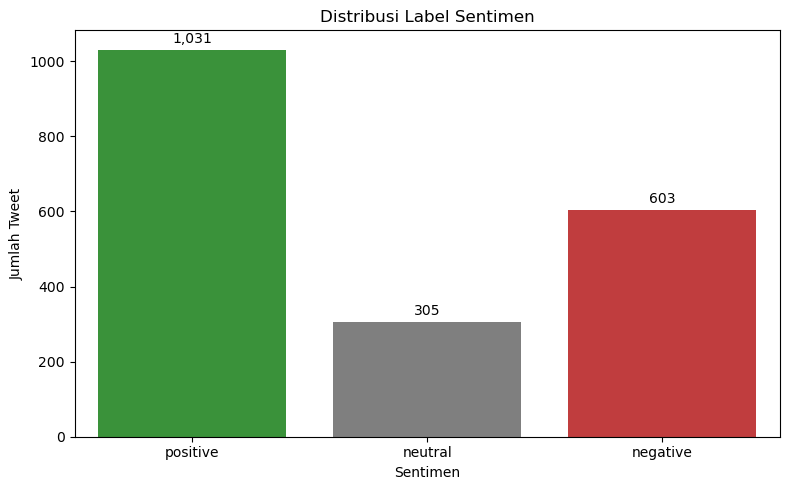

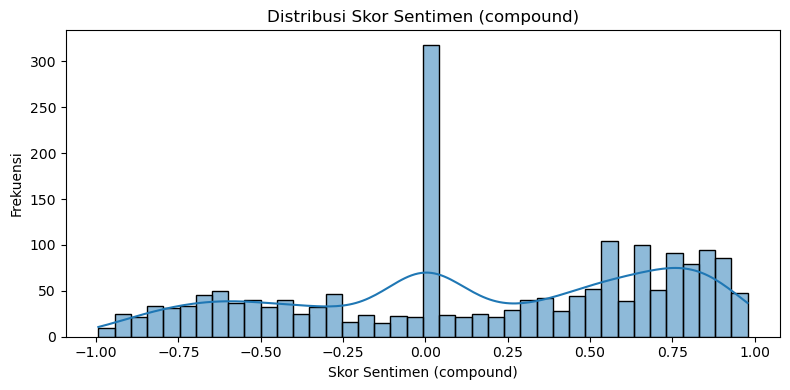

In [9]:
import seaborn as sns

import matplotlib.pyplot as plt

# Pastikan kolom tanggal dalam format datetime
df['created_at_dt'] = pd.to_datetime(df['created_at'], errors='coerce')

# 1) Distribusi label sentimen (count)
plt.figure(figsize=(8,5))
ax1 = sns.countplot(data=df, x='sentiment_label', order=['positive','neutral','negative'],
          palette={'positive':'#2ca02c','neutral':'#7f7f7f','negative':'#d62728'})
plt.title('Distribusi Label Sentimen')
plt.xlabel('Sentimen')
plt.ylabel('Jumlah Tweet')
# tambahkan anotasi jumlah di atas bar
for p in ax1.patches:
  ax1.annotate(format(int(p.get_height()), ','), 
         (p.get_x() + p.get_width() / 2., p.get_height()),
         ha='center', va='center', xytext=(0, 8), textcoords='offset points')
plt.tight_layout()
plt.show()

# 2) Histogram/Distribusi skor sentiment (compound)
plt.figure(figsize=(8,4))
sns.histplot(df['sentiment'], bins=40, kde=True, color='#1f77b4')
plt.title('Distribusi Skor Sentimen (compound)')
plt.xlabel('Skor Sentimen (compound)')
plt.ylabel('Frekuensi')
plt.tight_layout()
plt.show()

### Penjelasan
Kode berikut digunakan untuk menjalankan proses analisis atau pembersihan data. Pastikan semua dependensi sudah terinstal sebelum menjalankan cell ini.


In [13]:
# 7. Simpan hasil data
selected_columns = ['created_at','full_text','clean_text', 'sentiment', 'sentiment_label']
df[selected_columns].to_csv("../tweets-data/trumpt_clean.csv" , index=False)
print("✅ Preprocessing selesai! File disimpan sebagai trump_clean.csv")

✅ Preprocessing selesai! File disimpan sebagai trump_clean.csv



## 📊 Kesimpulan Analisis Sentimen

Berdasarkan hasil analisis sentimen terhadap tweet yang mengandung kata kunci *Trump*, dapat disimpulkan bahwa:

- Tweet dengan sentimen **positif** menunjukkan opini yang mendukung atau mengapresiasi kebijakan atau tindakan Trump.  
- Tweet dengan sentimen **negatif** mencerminkan kritik, ketidaksetujuan, atau pernyataan yang bernada menyerang.  
- Tweet dengan sentimen **netral** biasanya berupa pernyataan informatif, berita, atau fakta tanpa emosi yang kuat.

Visualisasi distribusi dan skor sentimen menunjukkan kecenderungan umum opini publik terhadap Trump selama periode waktu pengambilan data.
